In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math


In [ ]:
df=pd.read_csv('/content/UPI Transactions 23 24.csv')
df.head()

,Customer ID,Transaction ID,Transaction Amount,Amount Sent DateTime,Amount Received DateTime,Recipient ID,Transaction Category,Payment Method,Transaction Status,Customer Age,Sender Bank,Receiver Bank,From State,To State,UPI App,Transaction Device
0,77243371982,903126106589788681456,14993.73,2023-10-06 02:55:42,2023-10-06 02:56:26,3697158788,Travel,UPI,Success,22,Punjab National Bank,IndusInd Bank,Jharkhand,Jharkhand,Google Pay,Mobile
1,23355397215,802025143491598348865,2534.80,2023-12-07 22:18:56,2023-12-07 22:19:37,72886924680,Travel,UPI,Success,25,Union Bank of India,Yes Bank,Telangana,Telangana,Paytm,Mobile
2,10153181199,461983386094521109412,10478.46,2023-08-25 06:13:42,2023-08-25 06:14:26,55813045668,Travel,UPI,Success,64,Axis Bank,ICICI Bank,Meghalaya,Meghalaya,Paytm,Mobile
3,18868368192,910240804704991412414,471.46,2023-12-09 18:46:38,2023-12-09 18:47:22,46862003071,Shopping,UPI,Success,29,Punjab National Bank,Union Bank of India,West Bengal,West Bengal,Mobikwik,Tablet
4,58296809443,366853468515876436170,63391.63,2023-12-26 17:22:51,2023-12-26 17:23:32,3966148803,Movie Bill,UPI,Success,44,IndusInd Bank,Canara Bank,Meghalaya,Meghalaya,Google Pay,Mobile


In [ ]:
df.dtypes

,0
Customer ID,int64
Transaction ID,object
Transaction Amount,float64
Amount Sent DateTime,object
Amount Received DateTime,object
Recipient ID,int64
Transaction Category,object
Payment Method,object
Transaction Status,object
Customer Age,int64


In [ ]:
df.columns

Index(['Customer ID', 'Transaction ID', 'Transaction Amount',
       'Amount Sent DateTime', 'Amount Received DateTime', 'Recipient ID',
       'Transaction Category', 'Payment Method', 'Transaction Status',
       'Customer Age', 'Sender Bank', 'Receiver Bank', 'From State',
       'To State', 'UPI App', 'Transaction Device'],
      dtype='object')

In [ ]:
df['Amount Sent DateTime']=pd.to_datetime(df['Amount Sent DateTime'])
df['Amount Received DateTime']=pd.to_datetime(df['Amount Received DateTime'])
df['Customer ID'] = df['Customer ID'].astype(str)
df['Recipient ID'] = df['Recipient ID'].astype(str)


In [ ]:
df

,Customer ID,Transaction ID,Transaction Amount,Amount Sent DateTime,Amount Received DateTime,Recipient ID,Transaction Category,Payment Method,Transaction Status,Customer Age,Sender Bank,Receiver Bank,From State,To State,UPI App,Transaction Device
0,77243371982,903126106589788681456,14993.73,2023-10-06 02:55:42,2023-10-06 02:56:26,3697158788,Travel,UPI,Success,22,Punjab National Bank,IndusInd Bank,Jharkhand,Jharkhand,Google Pay,Mobile
1,23355397215,802025143491598348865,2534.80,2023-12-07 22:18:56,2023-12-07 22:19:37,72886924680,Travel,UPI,Success,25,Union Bank of India,Yes Bank,Telangana,Telangana,Paytm,Mobile
2,10153181199,461983386094521109412,10478.46,2023-08-25 06:13:42,2023-08-25 06:14:26,55813045668,Travel,UPI,Success,64,Axis Bank,ICICI Bank,Meghalaya,Meghalaya,Paytm,Mobile
3,18868368192,910240804704991412414,471.46,2023-12-09 18:46:38,2023-12-09 18:47:22,46862003071,Shopping,UPI,Success,29,Punjab National Bank,Union Bank of India,West Bengal,West Bengal,Mobikwik,Tablet
4,58296809443,366853468515876436170,63391.63,2023-12-26 17:22:51,2023-12-26 17:23:32,3966148803,Movie Bill,UPI,Success,44,IndusInd Bank,Canara Bank,Meghalaya,Meghalaya,Google Pay,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24746532553,699094054108977799256,3231.28,2024-04-20 16:26:29,2024-04-20 16:27:12,64876985810,Shopping,UPI,Success,31,Union Bank of India,Bank of Baroda,Meghalaya,Meghalaya,Google Pay,Mobile
49996,57775263059,564916336922738227856,681.59,2023-12-09 18:54:17,2023-12-09 18:55:00,76895922356,Loan Repayment,UPI,Success,21,HDFC Bank,HDFC Bank,Tripura,Manipur,Paytm,Tablet
49997,59736372767,723220415466185635628,1316.51,2023-11-11 04:52:28,2023-11-11 04:53:10,99520678569,Water Bill,UPI,Success,25,Yes Bank,ICICI Bank,Himachal Pradesh,Himachal Pradesh,Google Pay,Tablet
49998,62183867285,763599955223601516518,970.72,2023-07-08 09:13:16,2023-07-08 09:13:59,65243376681,Grocery,UPI,Success,25,Yes Bank,IndusInd Bank,Maharashtra,Maharashtra,Paytm,Tablet


1. Customer ID
- Transaction Frequency: Calculate the number of transactions per customer to find high-activity customers.
- Customer Segmentation: Group customers based on transaction frequency, total transaction amount, or preferred transaction methods.
Retention Analysis: Identify recurring customers by tracking their transaction activity over time.
2. Transaction ID
- Duplicate Transaction Check: Ensure each Transaction ID is unique to avoid double-counting.
- Transaction Pattern Analysis: Identify patterns in transaction IDs, if they follow specific trends or increments.
3. Transaction Amount
- Transaction Amount Distribution: Visualize transaction amounts to understand spending behavior. Look for the average, median, and outliers.
- Top Spenders: Identify customers with the highest cumulative transaction amounts.
- Transaction Size Analysis: Segment transactions into small, medium, and large to explore spending patterns.
4. Amount Sent DateTime / Amount Received DateTime
- Time Delay Analysis: Calculate the delay between sent and received times to assess transaction processing times.
- Peak Transaction Times: Analyze by hour, day, or month to determine when transactions peak.
Seasonal Trends: Look for seasonal or monthly trends in transaction frequency and volume.
5. Recipient ID
- Recipient Frequency: Identify common recipients by counting the number of times each recipient appears.
- Recipient Network: Explore customer-recipient connections, potentially creating a network graph to see customer relationships.
6. Transaction Category
- Category Distribution: Analyze the distribution of transaction categories to understand which types of transactions are most common.
- Category Spend Analysis: Calculate the average transaction amount by category.
- Category Trends Over Time: Track the popularity of transaction categories over time.
7. Payment Method
- Payment Method Popularity: Assess the popularity of different payment methods.
- Payment Method Trends: Analyze changes in payment method usage over time.
- Method Performance: Look for correlations between payment methods and transaction success rates.
8. Transaction Status
- Success Rate: Calculate the percentage of successful transactions.
- Failure Analysis: Investigate common reasons for transaction failures, especially if there are patterns by payment method or time.
- Status by Category or Method: Check if certain transaction categories or payment methods have higher success/failure rates.
9. Customer Age
- Age Group Analysis: Segment customers into age groups to examine age-based spending patterns.
- Age and Transaction Frequency: Analyze if transaction frequency correlates with customer age.
- Average Transaction Amount by Age Group: Determine if specific age groups tend to have higher or lower transaction amounts.
10. Sender Bank / Receiver Bank
- Bank Popularity: Identify the most commonly used sender and receiver banks.
- Bank-Specific Trends: Look for patterns specific to banks, such as transaction size or frequency.
- Bank Pairing Analysis: Check if certain bank pairs (sender-receiver) have frequent transactions.
11. From State / To State
- Geographic Transaction Flow: Map transactions between states to identify common transaction routes.
- State-Level Spending: Calculate total and average transaction amounts by state.
- Cross-State Transactions: Analyze the frequency and amount of transactions going between states.
12. UPI App
- UPI App Popularity: Determine which UPI apps are most frequently used.
- App Performance: Analyze transaction success/failure rates by UPI app.
- App Usage Trends: Track changes in app usage over time to see if any apps are gaining or losing popularity.
13. Transaction Device
- Device Type Distribution: Check if certain devices (e.g., mobile vs. desktop) are more common for transactions.
- Device Performance: Compare transaction success rates across device types.
- Device Trend Analysis: Track device usage over time, which could highlight trends in device preferences.

<ipython-input-59-83b35cdc76d2>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




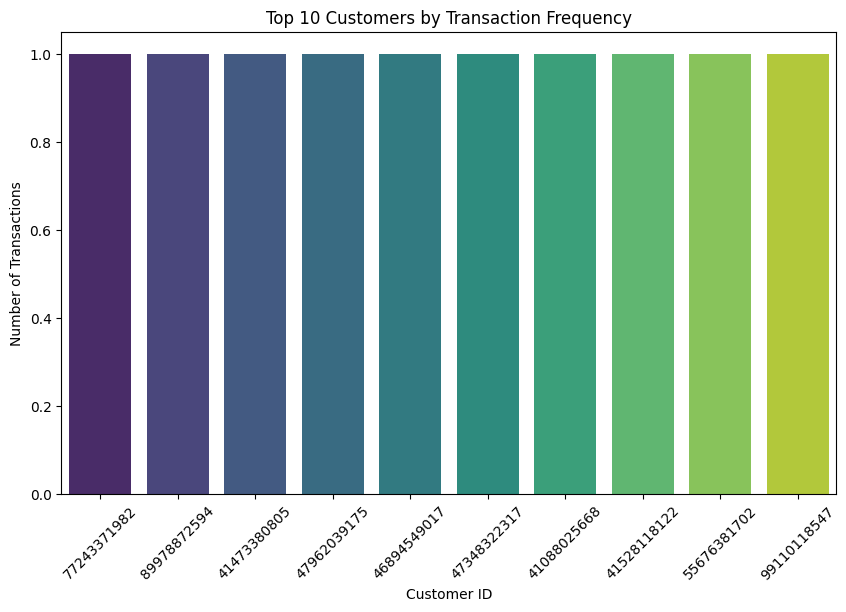

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count transactions per customer
transaction_counts = df['Customer ID'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index[:10], y=transaction_counts.values[:10], palette="viridis")
plt.title("Top 10 Customers by Transaction Frequency")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

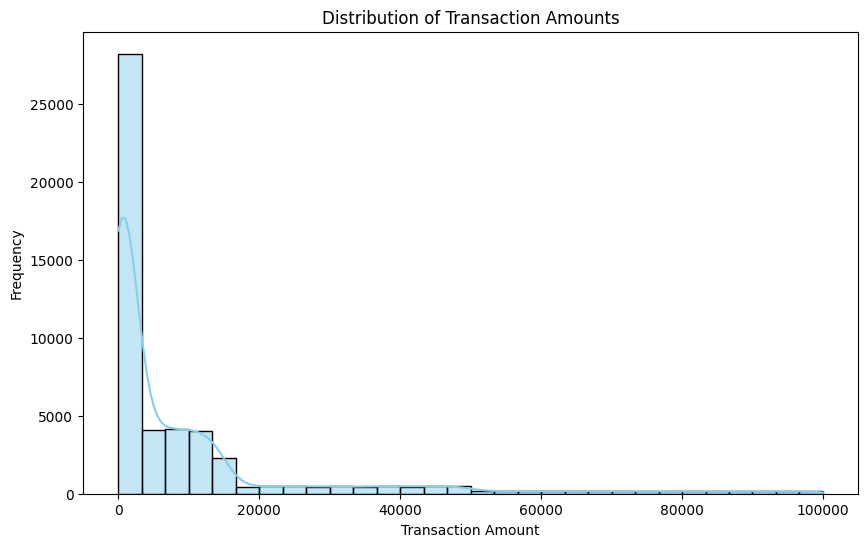

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction Amount'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import plotly.express as px

# Count transactions per customer
transaction_counts = df['Customer ID'].value_counts().head(10).reset_index()
transaction_counts.columns = ['Customer ID', 'Transaction Count']

fig = px.bar(transaction_counts, x='Customer ID', y='Transaction Count',
             title="Top 10 Customers by Transaction Frequency")
fig.show()


In [ ]:
# Calculate the delay in minutes
df['Delay'] = (df['Amount Received DateTime'] - df['Amount Sent DateTime']).dt.total_seconds() / 60

fig = px.histogram(df, x='Delay', nbins=30, title="Transaction Processing Delay (Minutes)")
fig.show()


In [ ]:
# Extract hour from Amount Sent DateTime
df['Hour'] = df['Amount Sent DateTime'].dt.hour
hourly_transactions = df['Hour'].value_counts().sort_index().reset_index()
hourly_transactions.columns = ['Hour', 'Transaction Count']

fig = px.line(hourly_transactions, x='Hour', y='Transaction Count',
              title="Transactions by Hour of Day", markers=True)
fig.show()


In [ ]:
fig = px.box(df, x='UPI App', y='Transaction Amount',
             title="Transaction Amount by UPI App")
fig.update_layout(xaxis_title="UPI App", yaxis_title="Transaction Amount")
fig.show()


In [ ]:
# Calculate success rate by payment method
success_rate = (df[df['Transaction Status'] == 'Success'].groupby('UPI App').size() /
                df.groupby('UPI App').size() * 100).reset_index()
success_rate.columns = ['UPI App', 'Success Rate']

fig = px.bar(success_rate, x='UPI App', y='Success Rate',
             title="Transaction Success Rate by UPI App")
fig.show()


In [ ]:
# Define age groups and calculate average transaction amount
df['Age Group'] = pd.cut(df['Customer Age'], bins=[0, 18, 30, 50, 70, 100],
                         labels=["<18", "18-30", "30-50", "50-70", "70+"])
avg_transaction_by_age = df.groupby('Age Group')['Transaction Amount'].mean().reset_index()

fig = px.bar(avg_transaction_by_age, x='Age Group', y='Transaction Amount',
             title="Average Transaction Amount by Age Group")
fig.show()


<ipython-input-66-8b7c73235729>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import plotly.graph_objects as go

# Sender State Graph
sender_data = df.groupby('From State').size().reset_index(name='Count')

fig_sender = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sender_data['From State'].tolist(),
    ),
    link=dict(
        source=[i for i in range(len(sender_data))],  # Source is each sender state
        target=[0] * len(sender_data),  # Use a dummy single target (or adjust to the number of unique sender states if needed)
        value=sender_data['Count']
    ))])

fig_sender.update_layout(title_text="Transactions by Sender State", font_size=10)
fig_sender.show()

# Receiver State Graph
receiver_data = df.groupby('To State').size().reset_index(name='Count')

fig_receiver = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=receiver_data['To State'].tolist(),
    ),
    link=dict(
        source=[0] * len(receiver_data),  # Use a dummy single source (or adjust to the number of unique receiver states if needed)
        target=[i for i in range(len(receiver_data))],  # Target is each receiver state
        value=receiver_data['Count']
    ))])

fig_receiver.update_layout(title_text="Transactions by Receiver State", font_size=10)
fig_receiver.show()


In [ ]:
# Count transactions by UPI App
app_counts = df['UPI App'].value_counts().reset_index()
app_counts.columns = ['UPI App', 'Transaction Count']

fig = px.pie(app_counts, values='Transaction Count', names='UPI App',
             title="UPI App Usage Share by Transaction Count")
fig.show()


In [ ]:
len(df)

50000

In [ ]:
# Count transactions by device type
device_counts = df['Transaction Device'].value_counts().reset_index()
device_counts.columns = ['Transaction Device', 'Transaction Count']

fig = px.bar(device_counts, x='Transaction Device', y='Transaction Count',
             title="Transaction Count by Device Type")
fig.show()


In [ ]:
import plotly.express as px

# Group and count transactions by sender state
top_sender_states = df.groupby('From State').size().nlargest(10).reset_index(name='Transaction Count')

# Plot the top 10 sender states
fig = px.bar(top_sender_states, x='From State', y='Transaction Count',
             title="Top 10 Sender States by Transaction Count",
             labels={'From State': 'Sender State', 'Transaction Count': 'Transaction Count'},
             color='Transaction Count',
             color_continuous_scale='Reds')

fig.update_layout(xaxis_title="Sender State", yaxis_title="Transaction Count")
fig.show()


In [ ]:
top_receiver_states = df.groupby('To State').size().nlargest(10).reset_index(name='Transaction Count')

# Plot the top 10 receiver states
fig = px.bar(top_receiver_states, x='To State', y='Transaction Count',
             title="Top 10 Receiver States by Transaction Count",
             labels={'To State': 'Receiver State', 'Transaction Count': 'Transaction Count'},
             color='Transaction Count',
             color_continuous_scale='Greens')

fig.update_layout(xaxis_title="Receiver State", yaxis_title="Transaction Count")
fig.show()

In [ ]:
top_receiver_states = df.groupby('To State').size().nsmallest(10).reset_index(name='Transaction Count')

# Plot the top 10 receiver states
fig = px.bar(top_receiver_states, x='To State', y='Transaction Count',
             title="Top 10 Receiver States by Least Transaction Count",
             labels={'To State': 'Receiver State', 'Transaction Count': 'Transaction Count'},
             color='Transaction Count',
             color_continuous_scale='Greens')

fig.update_layout(xaxis_title="Receiver State", yaxis_title="Transaction Count")
fig.show()

In [ ]:
unique_values = df['From State'].unique()

# Display the unique values
print(unique_values)

['Jharkhand' 'Telangana' 'Meghalaya' 'West Bengal' 'Goa' 'Punjab'
 'Karnataka' 'Madhya Pradesh' 'Assam' 'Bihar' 'Tripura' 'Maharashtra'
 'Himachal Pradesh' 'Mizoram' 'Gujarat' 'Nagaland' 'Delhi' 'Odisha'
 'Manipur' 'Chhattisgarh' 'Haryana' 'Kerala' 'Andhra Pradesh' 'Sikkim'
 'Arunachal Pradesh' 'Rajasthan' 'Uttarakhand' 'Tamil Nadu'
 'Uttar Pradesh']


In [ ]:
# Count transactions by UPI App
app_counts = df['Transaction Category'].value_counts().reset_index()
app_counts.columns = ['Transaction Category', 'Transaction Count']

fig = px.pie(app_counts, values='Transaction Count', names='Transaction Category',
             title="Transaction Category Usage Share by Transaction Count")
fig.show()